In [100]:
# Імпорт необхідних бібліотек
import pandas as pd  # Для роботи з даними
import numpy as np  # Для числових обчислень
import matplotlib.pyplot as plt  # Для побудови графіків
import seaborn as sns  # Для статистичних графіків
from sklearn.model_selection import train_test_split  # Для розділення даних
from sklearn.preprocessing import StandardScaler  # Для стандартизації
from sklearn.metrics import mean_squared_error, r2_score  # Метрики якості
from scipy import stats  # Статистичні функції
from scipy.stats import shapiro, jarque_bera  # Тести нормальності
from statsmodels.stats.stattools import durbin_watson  # Тест автокореляції
from statsmodels.stats.outliers_influence import variance_inflation_factor  # VIF
import warnings
warnings.filterwarnings('ignore')  # Вимкнення попереджень

# Налаштування для відображення графіків
plt.style.use('seaborn-v0_8')  # Стиль графіків
plt.rcParams['figure.figsize'] = (12, 8)  # Розмір графіків
plt.rcParams['font.size'] = 12  # Розмір шрифту


In [101]:
# Завантаження та попередня обробка даних
df = pd.read_csv('Student_Performance.csv')  # Завантаження CSV файлу

print(f"Розмір датасету: {df.shape}")  # Виведення розмірів (рядки, стовпці)
print(f"Кількість рядків: {df.shape[0]}")  # Кількість спостережень
print(f"Кількість стовпців: {df.shape[1]}")  # Кількість змінних

print("\nПерші 5 рядків датасету:")
print(df.head())  # Показ перших 5 рядків

print("\nОписова статистика:")
print(df.describe())  # Статистичні характеристики числових змінних

print("\nІнформація про датасет:")
print(df.info())  # Типи даних та кількість непорожніх значень

print("\nКількість пропущених значень:")
print(df.isnull().sum())  # Підрахунок пропущених значень по стовпцях


Розмір датасету: (10000, 6)
Кількість рядків: 10000
Кількість стовпців: 6

Перші 5 рядків датасету:
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  

Описова статистика:
       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.00000

In [102]:
# Обробка категоріальних змінних
df_processed = df.copy()  # Створення копії датасету для обробки

# Перевірка унікальних значень в кожному стовпці
for col in df_processed.columns:  # Цикл по всіх стовпцях
    unique_vals = df_processed[col].unique()  # Отримання унікальних значень
    print(f"{col}: {len(unique_vals)} унікальних значень")  # Виведення кількості
    if len(unique_vals) <= 10:  # Якщо не більше 10 значень
        print(f"  Значення: {unique_vals}")  # Показ самих значень

# Мапінг для категоріальних змінних
categorical_mappings = {  # Словник для перетворення категорій
    'Extracurricular Activities': {'No': 0, 'Yes': 1}  # No -> 0, Yes -> 1
}

# Застосування мапінгу
for col, mapping in categorical_mappings.items():  # Цикл по мапінгах
    if col in df_processed.columns:  # Якщо стовпець існує
        df_processed[col] = df_processed[col].map(mapping)  # Застосування мапінгу
        print(f"Перетворено {col}: {mapping}")  # Підтвердження перетворення

# Видалення рядків з пропущеними значеннями
print(f"\nДо видалення: {df_processed.shape[0]} рядків")  # Кількість до очищення
df_processed = df_processed.dropna()  # Видалення рядків з NaN
print(f"Після видалення: {df_processed.shape[0]} рядків")  # Кількість після очищення

print("\nОстаточний датасет:")
print(df_processed.head())  # Показ перших 5 рядків після обробки
print(f"\nТипи даних:")
print(df_processed.dtypes)  # Типи даних після обробки


Hours Studied: 9 унікальних значень
  Значення: [7 4 8 5 3 6 2 1 9]
Previous Scores: 60 унікальних значень
Extracurricular Activities: 2 унікальних значень
  Значення: ['Yes' 'No']
Sleep Hours: 6 унікальних значень
  Значення: [9 4 7 5 8 6]
Sample Question Papers Practiced: 10 унікальних значень
  Значення: [1 2 5 6 0 8 3 4 9 7]
Performance Index: 91 унікальних значень
Перетворено Extracurricular Activities: {'No': 0, 'Yes': 1}

До видалення: 10000 рядків
Після видалення: 10000 рядків

Остаточний датасет:
   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               99                           1            9   
1              4               82                           0            4   
2              8               51                           1            7   
3              5               52                           1            5   
4              7               75                           0            8   

   Sample Question P

In [103]:
# Визначення цільової змінної та ознак
target_column = df_processed.columns[-1]  # Останній стовпець - цільова змінна
feature_columns = df_processed.columns[:-1]  # Всі крім останнього - ознаки

print(f"Цільова змінна: {target_column}")  # Назва цільової змінної
print(f"Ознаки ({len(feature_columns)}): {list(feature_columns)}")  # Список ознак

# Розділення на ознаки та цільову змінну
X = df_processed[feature_columns].values  # Матриця ознак (m x n)
y = df_processed[target_column].values  # Вектор цільової змінної (m x 1)

print(f"\nРозміри:")
print(f"X (ознаки): {X.shape}")  # Розмір матриці ознак
print(f"y (цільова змінна): {y.shape}")  # Розмір вектора цільової змінної

# Розділення на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # 20% тестових, 80% навчальних
)

print(f"\nРозділення на вибірки:")
print(f"Навчальна вибірка: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Тестова вибірка: X_test {X_test.shape}, y_test {y_test.shape}")

# Стандартизація ознак
scaler = StandardScaler()  # Створення об'єкта стандартизації
X_train_scaled = scaler.fit_transform(X_train)  # Навчання та застосування до навчальних даних
X_test_scaled = scaler.transform(X_test)  # Застосування до тестових даних

print(f"\nСтандартизація завершена!")
print(f"Середнє значення навчальних даних: {X_train_scaled.mean(axis=0)}")  # Середні після стандартизації
print(f"Стандартне відхилення навчальних даних: {X_train_scaled.std(axis=0)}")  # Стандартні відхилення

# Додавання стовпця з одиницями для вільного члена
X_train_final = np.column_stack([np.ones(X_train_scaled.shape[0]), X_train_scaled])  # Додавання стовпця з 1
X_test_final = np.column_stack([np.ones(X_test_scaled.shape[0]), X_test_scaled])  # Додавання стовпця з 1

print(f"\nДодано стовпець з одиницями:")
print(f"X_train_final: {X_train_final.shape}")  # Розмір після додавання вільного члена
print(f"X_test_final: {X_test_final.shape}")  # Розмір після додавання вільного члена


Цільова змінна: Performance Index
Ознаки (5): ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']

Розміри:
X (ознаки): (10000, 5)
y (цільова змінна): (10000,)

Розділення на вибірки:
Навчальна вибірка: X_train (8000, 5), y_train (8000,)
Тестова вибірка: X_test (2000, 5), y_test (2000,)

Стандартизація завершена!
Середнє значення навчальних даних: [-1.07469589e-16 -3.24296145e-16  3.19530513e-15 -8.23376090e-16
  6.23737173e-17]
Стандартне відхилення навчальних даних: [1. 1. 1. 1. 1.]

Додано стовпець з одиницями:
X_train_final: (8000, 6)
X_test_final: (2000, 6)


In [104]:
# Реалізація градієнтного спуску
def compute_cost(X, y, theta):
    m = len(y)  # Кількість спостережень
    predictions = X.dot(theta)  # Передбачення: X * theta
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)  # MSE формула
    return cost

def gradient_descent(X, y, theta, learning_rate, epochs):
    m = len(y)  # Кількість спостережень
    cost_history = []  # Список для збереження історії втрат
    
    for epoch in range(epochs):  # Цикл по епохах
        predictions = X.dot(theta)  # Обчислення передбачень
        error = predictions - y  # Обчислення помилки
        gradient = (1 / m) * X.T.dot(error)  # Обчислення градієнта
        theta = theta - learning_rate * gradient  # Оновлення параметрів
        cost = compute_cost(X, y, theta)  # Обчислення функції втрат
        cost_history.append(cost)  # Збереження втрат
        
        if epoch % 100 == 0:  # Виведення кожні 100 епох
            print(f"Епоха {epoch}: MSE = {cost:.6f}")
    
    return theta, cost_history


In [105]:
# Навчання моделі
learning_rate = 0.01  # Швидкість навчання
epochs = 1000  # Кількість епох

# Ініціалізація параметрів
theta_initial = np.zeros(X_train_final.shape[1])  # Початкові параметри (нулі)

print(f"Початкові параметри: {theta_initial}")  # Виведення початкових параметрів
print(f"Швидкість навчання: {learning_rate}")  # Виведення швидкості навчання
print(f"Кількість епох: {epochs}")  # Виведення кількості епох

# Навчання моделі
print("\nПроцес навчання:")
theta_final, cost_history = gradient_descent(  # Виклик функції градієнтного спуску
    X_train_final, y_train, theta_initial, learning_rate, epochs
)

print(f"\nНавчання завершено!")
print(f"Фінальні параметри (theta): {theta_final}")  # Виведення фінальних параметрів

# Створення DataFrame з коефіцієнтами
coefficients_df = pd.DataFrame({  # Створення таблиці коефіцієнтів
    'Ознака': ['Вільний член'] + list(feature_columns),  # Назви ознак
    'Коефіцієнт': theta_final  # Значення коефіцієнтів
})

print(f"\nКоефіцієнти моделі:")
print(coefficients_df)  # Виведення таблиці коефіцієнтів


Початкові параметри: [0. 0. 0. 0. 0. 0.]
Швидкість навчання: 0.01
Кількість епох: 1000

Процес навчання:
Епоха 0: MSE = 1679.972539
Епоха 100: MSE = 227.206350
Епоха 200: MSE = 32.293950
Епоха 300: MSE = 6.139273
Епоха 400: MSE = 2.629105
Епоха 500: MSE = 2.157935
Епоха 600: MSE = 2.094679
Епоха 700: MSE = 2.086186
Епоха 800: MSE = 2.085045
Епоха 900: MSE = 2.084892

Навчання завершено!
Фінальні параметри (theta): [55.30911213  7.40093109 17.63646538  0.30430629  0.81002051  0.54895455]

Коефіцієнти моделі:
                             Ознака  Коефіцієнт
0                      Вільний член   55.309112
1                     Hours Studied    7.400931
2                   Previous Scores   17.636465
3        Extracurricular Activities    0.304306
4                       Sleep Hours    0.810021
5  Sample Question Papers Practiced    0.548955


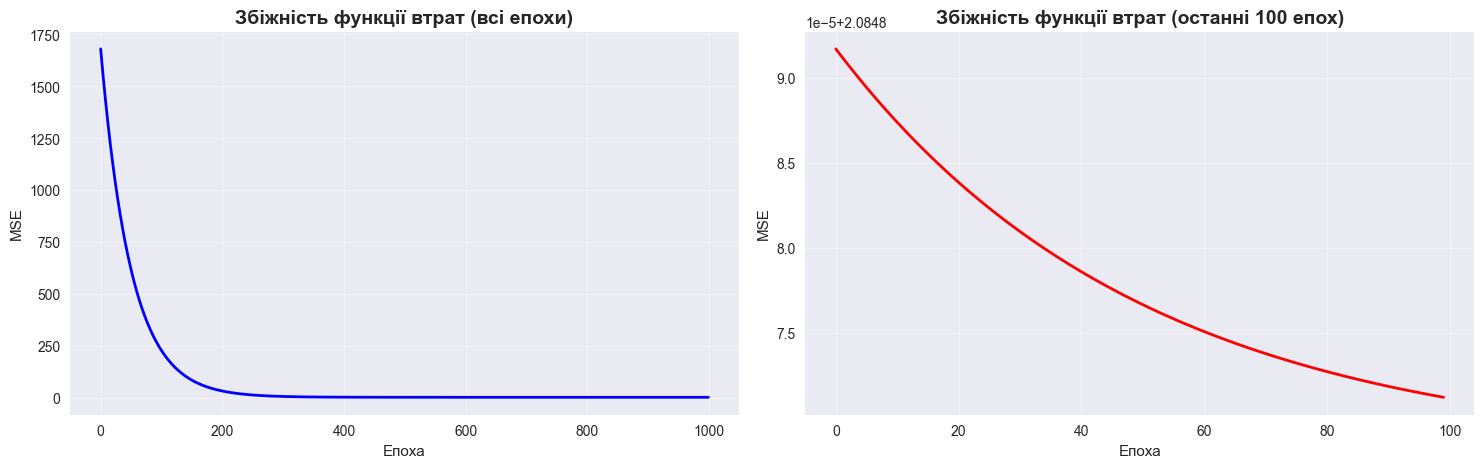

Статистика збіжності:
Початкова MSE: 1679.972539
Фінальна MSE: 2.084871
Покращення: 99.88%
Кількість епох до збіжності: 1000
Зміна MSE в останній епосі: 0.00000007
Алгоритм збігся!


In [106]:
# Графік збіжності функції втрат
plt.figure(figsize=(15, 5))  # Створення фігури з двома підграфіками

# Графік для всіх епох
plt.subplot(1, 2, 1)  # Перший підграфік
plt.plot(cost_history, 'b-', linewidth=2)  # Побудова графіка втрат
plt.title('Збіжність функції втрат (всі епохи)', fontsize=14, fontweight='bold')  # Заголовок
plt.xlabel('Епоха')  # Підпис осі X
plt.ylabel('MSE')  # Підпис осі Y
plt.grid(True, alpha=0.3)  # Сітка

# Графік для останніх 100 епох (детальний вигляд)
plt.subplot(1, 2, 2)  # Другий підграфік
plt.plot(cost_history[-100:], 'r-', linewidth=2)  # Побудова графіка останніх 100 епох
plt.title('Збіжність функції втрат (останні 100 епох)', fontsize=14, fontweight='bold')  # Заголовок
plt.xlabel('Епоха')  # Підпис осі X
plt.ylabel('MSE')  # Підпис осі Y
plt.grid(True, alpha=0.3)  # Сітка

plt.tight_layout()  # Автоматичне розташування підграфіків
plt.show()  # Відображення графіка

# Статистика збіжності
initial_cost = cost_history[0]  # Початкова втрата
final_cost = cost_history[-1]  # Фінальна втрата
improvement = ((initial_cost - final_cost) / initial_cost) * 100  # Відсоток покращення

print(f"Статистика збіжності:")
print(f"Початкова MSE: {initial_cost:.6f}")  # Виведення початкової MSE
print(f"Фінальна MSE: {final_cost:.6f}")  # Виведення фінальної MSE
print(f"Покращення: {improvement:.2f}%")  # Виведення відсотка покращення
print(f"Кількість епох до збіжності: {len(cost_history)}")  # Кількість епох

# Перевірка збіжності
if len(cost_history) > 1:  # Якщо є більше однієї епохи
    cost_change = abs(cost_history[-1] - cost_history[-2])  # Зміна в останній епосі
    print(f"Зміна MSE в останній епосі: {cost_change:.8f}")  # Виведення зміни
    if cost_change < 1e-6:  # Якщо зміна дуже мала
        print("Алгоритм збігся!")  # Підтвердження збіжності
    else:  # Інакше
        print("Алгоритм може потребувати більше епох для збіжності")  # Попередження


In [107]:
# Оцінка якості моделі на тестовій вибірці
y_pred = X_test_final.dot(theta_final)  # Передбачення на тестовій вибірці

# Обчислення метрик
mse_test = mean_squared_error(y_test, y_pred)  # Середня квадратична помилка
r2_test = r2_score(y_test, y_pred)  # Коефіцієнт детермінації

print(f"Метрики якості на тестовій вибірці:")
print(f"MSE (Mean Squared Error): {mse_test:.6f}")  # Виведення MSE
print(f"R² (R-squared): {r2_test:.6f}")  # Виведення R²

# Обчислення залишків
residuals = y_test - y_pred  # Різниця між фактичними та передбаченими значеннями

print(f"\nСтатистика залишків:")
print(f"Середнє значення залишків: {np.mean(residuals):.6f}")  # Середнє залишків
print(f"Стандартне відхилення залишків: {np.std(residuals):.6f}")  # Стандартне відхилення
print(f"Мінімальний залишок: {np.min(residuals):.6f}")  # Мінімальний залишок
print(f"Максимальний залишок: {np.max(residuals):.6f}")  # Максимальний залишок

# Порівняння з базовою моделлю (середнє значення)
y_mean = np.mean(y_test)  # Середнє значення тестової вибірки
mse_baseline = mean_squared_error(y_test, [y_mean] * len(y_test))  # MSE базової моделі
r2_baseline = 1 - (mse_test / mse_baseline)  # R² базової моделі

print(f"\nПорівняння з базовою моделлю:")
print(f"Базова MSE (середнє значення): {mse_baseline:.6f}")  # MSE базової моделі
print(f"Наша MSE: {mse_test:.6f}")  # MSE нашої моделі
print(f"Покращення: {((mse_baseline - mse_test) / mse_baseline) * 100:.2f}%")  # Відсоток покращення

# Інтерпретація R²
if r2_test > 0.7:  # Якщо R² > 0.7
    interpretation = "відмінна"  # Відмінна якість
elif r2_test > 0.5:  # Якщо R² > 0.5
    interpretation = "хороша"  # Хороша якість
elif r2_test > 0.3:  # Якщо R² > 0.3
    interpretation = "задовільна"  # Задовільна якість
else:  # Інакше
    interpretation = "слабка"  # Слабка якість

print(f"\nІнтерпретація R² = {r2_test:.3f}:")
print(f"Модель пояснює {r2_test*100:.1f}% варіації цільової змінної")  # Відсоток поясненої варіації
print(f"Якість моделі: {interpretation}")  # Оцінка якості


Метрики якості на тестовій вибірці:
MSE (Mean Squared Error): 4.082455
R² (R-squared): 0.988984

Статистика залишків:
Середнє значення залишків: -0.077402
Стандартне відхилення залишків: 2.019025
Мінімальний залишок: -7.613434
Максимальний залишок: 6.840217

Порівняння з базовою моделлю:
Базова MSE (середнє значення): 370.585116
Наша MSE: 4.082455
Покращення: 98.90%

Інтерпретація R² = 0.989:
Модель пояснює 98.9% варіації цільової змінної
Якість моделі: відмінна


In [108]:
# 1. Аналіз лінійності зв'язку
print("1. Аналіз лінійності зв'язку")

# Кореляція між фактичними та передбаченими значеннями
correlation = np.corrcoef(y_test, y_pred)[0, 1]  # Обчислення кореляції
print(f"Кореляція між фактичними та передбаченими значеннями: {correlation:.4f}")  # Виведення кореляції

# Висновок про лінійність
if correlation > 0.8:  # Якщо кореляція > 0.8
    linearity_conclusion = "Лінійність виконується добре"  # Добре
elif correlation > 0.6:  # Якщо кореляція > 0.6
    linearity_conclusion = "Лінійність частково виконується"  # Частково
else:  # Інакше
    linearity_conclusion = "Лінійність не виконується"  # Не виконується

print(f"Висновок: {linearity_conclusion}")  # Виведення висновку


1. Аналіз лінійності зв'язку
Кореляція між фактичними та передбаченими значеннями: 0.9945
Висновок: Лінійність виконується добре


2. Аналіз мультиколінеарності


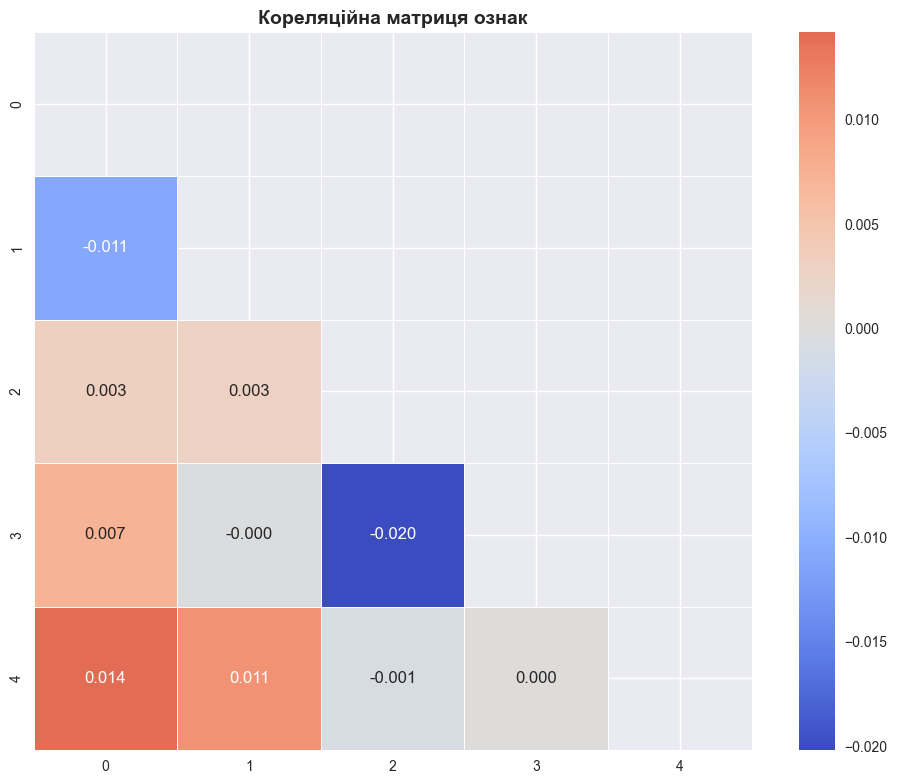


VIF (Variance Inflation Factor):
                             Ознака       VIF
3                       Sleep Hours  1.000461
2        Extracurricular Activities  1.000428
0                     Hours Studied  1.000387
4  Sample Question Papers Practiced  1.000320
1                   Previous Scores  1.000243

Висновок: Мультиколінеарність відсутня


In [109]:
# 2. Аналіз мультиколінеарності
print("2. Аналіз мультиколінеарності")

# Кореляційна матриця
correlation_matrix = np.corrcoef(X_train_scaled.T)  # Обчислення кореляційної матриці

plt.figure(figsize=(10, 8))  # Створення фігури
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Маска для верхнього трикутника
sns.heatmap(correlation_matrix,  # Теплова карта
            mask=mask,  # Застосування маски
            annot=True,  # Показ значень
            cmap='coolwarm',  # Кольорова схема
            center=0,  # Центр кольорової шкали
            square=True,  # Квадратні клітинки
            linewidths=0.5,  # Товщина ліній
            fmt='.3f')  # Формат чисел
plt.title('Кореляційна матриця ознак', fontsize=14, fontweight='bold')  # Заголовок
plt.tight_layout()  # Автоматичне розташування
plt.show()  # Відображення графіка

# Обчислення VIF (Variance Inflation Factor)
print("\nVIF (Variance Inflation Factor):")
vif_data = []  # Список для збереження VIF значень
for i in range(X_train_scaled.shape[1]):  # Цикл по всіх ознаках
    vif = variance_inflation_factor(X_train_scaled, i)  # Обчислення VIF для i-ї ознаки
    vif_data.append([feature_columns[i], vif])  # Додавання до списку

vif_df = pd.DataFrame(vif_data, columns=['Ознака', 'VIF'])  # Створення DataFrame
vif_df = vif_df.sort_values('VIF', ascending=False)  # Сортування за VIF
print(vif_df)  # Виведення таблиці VIF

# Визначення проблемних ознак
high_vif = vif_df[vif_df['VIF'] > 10]  # Ознаки з VIF > 10
if len(high_vif) > 0:  # Якщо є ознаки з високим VIF
    multicollinearity_conclusion = f"Мультиколінеарність виявлена в ознаках: {list(high_vif['Ознака'])}"
elif len(vif_df[vif_df['VIF'] > 5]) > 0:  # Якщо є ознаки з VIF > 5
    multicollinearity_conclusion = "Потенційна мультиколінеарність (VIF > 5)"
else:  # Інакше
    multicollinearity_conclusion = "Мультиколінеарність відсутня"

print(f"\nВисновок: {multicollinearity_conclusion}")  # Виведення висновку


3. Аналіз нормальності залишків


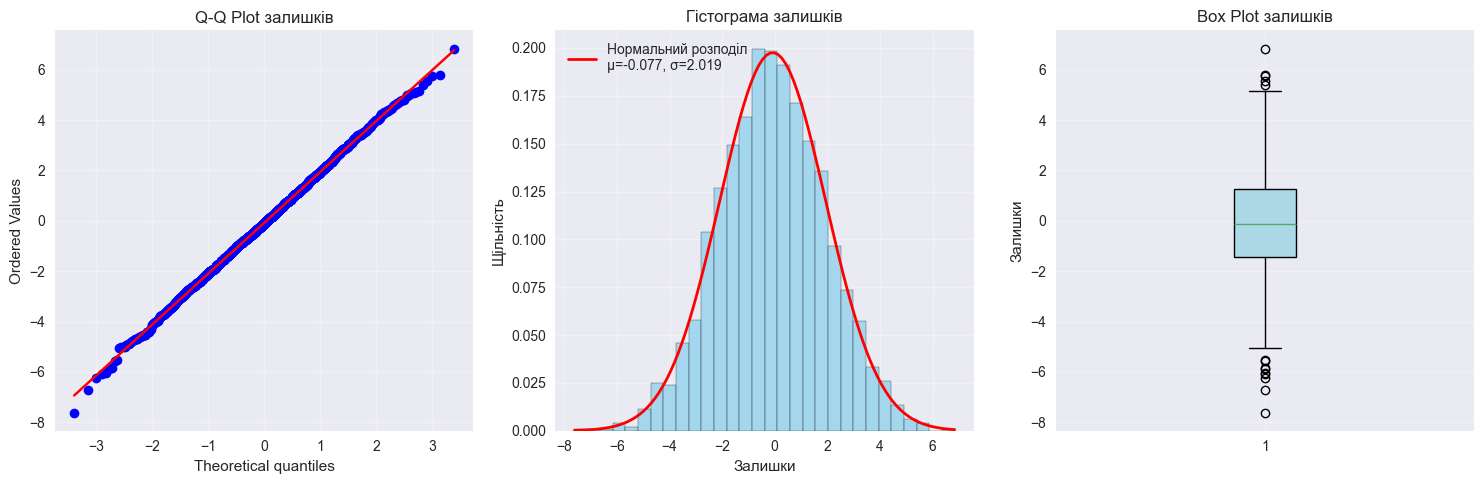


Статистичні тести нормальності:
Тест Шапіро-Вілка:
  Статистика: 0.999610
  p-value: 0.975075
  Результат: Нормальність

Тест Жарка-Бера:
  Статистика: 0.085251
  p-value: 0.958270
  Результат: Нормальність

Висновок: Нормальність залишків підтверджена


In [110]:
# 3. Аналіз нормальності залишків
print("3. Аналіз нормальності залишків")

plt.figure(figsize=(15, 5))  # Створення фігури з трьома підграфіками

# Q-Q plot
plt.subplot(1, 3, 1)  # Перший підграфік
stats.probplot(residuals, dist="norm", plot=plt)  # Q-Q plot для нормальності
plt.title('Q-Q Plot залишків')  # Заголовок
plt.grid(True, alpha=0.3)  # Сітка

# Гістограма залишків
plt.subplot(1, 3, 2)  # Другий підграфік
plt.hist(residuals, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')  # Гістограма
# Додавання нормального розподілу для порівняння
mu, sigma = stats.norm.fit(residuals)  # Підгонка нормального розподілу
x = np.linspace(residuals.min(), residuals.max(), 100)  # Точки для кривої
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, 
         label=f'Нормальний розподіл\nμ={mu:.3f}, σ={sigma:.3f}')  # Крива нормального розподілу
plt.xlabel('Залишки')  # Підпис осі X
plt.ylabel('Щільність')  # Підпис осі Y
plt.title('Гістограма залишків')  # Заголовок
plt.legend()  # Легенда
plt.grid(True, alpha=0.3)  # Сітка

# Box plot залишків
plt.subplot(1, 3, 3)  # Третій підграфік
plt.boxplot(residuals, patch_artist=True, boxprops=dict(facecolor='lightblue'))  # Box plot
plt.ylabel('Залишки')  # Підпис осі Y
plt.title('Box Plot залишків')  # Заголовок
plt.grid(True, alpha=0.3)  # Сітка

plt.tight_layout()  # Автоматичне розташування
plt.show()  # Відображення графіка

# Статистичні тести нормальності
print("\nСтатистичні тести нормальності:")

# Тест Шапіро-Вілка (для малих вибірок < 5000)
if len(residuals) < 5000:  # Якщо вибірка менша за 5000
    shapiro_stat, shapiro_p = shapiro(residuals)  # Тест Шапіро-Вілка
    print(f"Тест Шапіро-Вілка:")
    print(f"  Статистика: {shapiro_stat:.6f}")  # Статистика тесту
    print(f"  p-value: {shapiro_p:.6f}")  # p-значення
    shapiro_result = "Нормальність" if shapiro_p > 0.05 else "Відхилення нормальності"  # Результат
    print(f"  Результат: {shapiro_result}")  # Виведення результату

# Тест Жарка-Бера
jb_stat, jb_p = jarque_bera(residuals)  # Тест Жарка-Бера
print(f"\nТест Жарка-Бера:")
print(f"  Статистика: {jb_stat:.6f}")  # Статистика тесту
print(f"  p-value: {jb_p:.6f}")  # p-значення
jb_result = "Нормальність" if jb_p > 0.05 else "Відхилення нормальності"  # Результат
print(f"  Результат: {jb_result}")  # Виведення результату

# Загальний висновок
if len(residuals) < 5000:  # Якщо вибірка менша за 5000
    if shapiro_p > 0.05 and jb_p > 0.05:  # Якщо обидва тести підтверджують нормальність
        normality_conclusion = "Нормальність залишків підтверджена"
    elif shapiro_p > 0.05 or jb_p > 0.05:  # Якщо один тест підтверджує
        normality_conclusion = "Нормальність залишків частково підтверджена"
    else:  # Інакше
        normality_conclusion = "Нормальність залишків відхилена"
else:  # Для великих вибірок
    if jb_p > 0.05:  # Якщо тест Жарка-Бера підтверджує
        normality_conclusion = "Нормальність залишків підтверджена"
    else:  # Інакше
        normality_conclusion = "Нормальність залишків відхилена"

print(f"\nВисновок: {normality_conclusion}")  # Виведення висновку


4. Аналіз гомоскедастичності


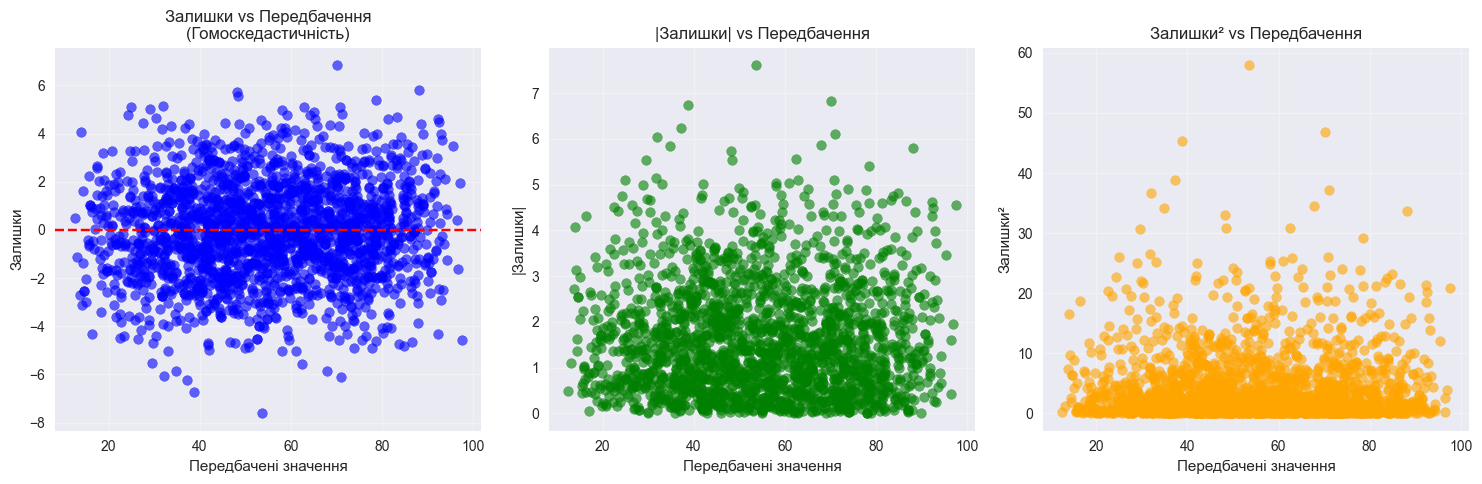

Кореляція між |залишками| та передбаченнями: -0.0099
Кореляція між залишками² та передбаченнями: 0.0007

Висновок: Гомоскедастичність підтверджена


In [111]:
# 4. Аналіз гомоскедастичності
print("4. Аналіз гомоскедастичності")

plt.figure(figsize=(15, 5))  # Створення фігури з трьома підграфіками

# Графік залишків vs передбачень (детальний)
plt.subplot(1, 3, 1)  # Перший підграфік
plt.scatter(y_pred, residuals, alpha=0.6, color='blue')  # Розсіювання залишків
plt.axhline(y=0, color='red', linestyle='--')  # Горизонтальна лінія на рівні 0
plt.xlabel('Передбачені значення')  # Підпис осі X
plt.ylabel('Залишки')  # Підпис осі Y
plt.title('Залишки vs Передбачення\n(Гомоскедастичність)')  # Заголовок
plt.grid(True, alpha=0.3)  # Сітка

# Графік абсолютних залишків vs передбачень
plt.subplot(1, 3, 2)  # Другий підграфік
abs_residuals = np.abs(residuals)  # Абсолютні значення залишків
plt.scatter(y_pred, abs_residuals, alpha=0.6, color='green')  # Розсіювання абсолютних залишків
plt.xlabel('Передбачені значення')  # Підпис осі X
plt.ylabel('|Залишки|')  # Підпис осі Y
plt.title('|Залишки| vs Передбачення')  # Заголовок
plt.grid(True, alpha=0.3)  # Сітка

# Графік квадратних залишків vs передбачень
plt.subplot(1, 3, 3)  # Третій підграфік
squared_residuals = residuals ** 2  # Квадрати залишків
plt.scatter(y_pred, squared_residuals, alpha=0.6, color='orange')  # Розсіювання квадратів
plt.xlabel('Передбачені значення')  # Підпис осі X
plt.ylabel('Залишки²')  # Підпис осі Y
plt.title('Залишки² vs Передбачення')  # Заголовок
plt.grid(True, alpha=0.3)  # Сітка

plt.tight_layout()  # Автоматичне розташування
plt.show()  # Відображення графіка

# Простий тест: кореляція між абсолютними залишками та передбаченнями
correlation_abs = np.corrcoef(y_pred, abs_residuals)[0, 1]  # Кореляція |залишків| з передбаченнями
correlation_squared = np.corrcoef(y_pred, squared_residuals)[0, 1]  # Кореляція залишків² з передбаченнями

print(f"Кореляція між |залишками| та передбаченнями: {correlation_abs:.4f}")  # Виведення кореляції
print(f"Кореляція між залишками² та передбаченнями: {correlation_squared:.4f}")  # Виведення кореляції

# Визначення гомоскедастичності
if abs(correlation_abs) < 0.3 and abs(correlation_squared) < 0.3:  # Якщо кореляції малі
    homoscedasticity_conclusion = "Гомоскедастичність підтверджена"
elif abs(correlation_abs) < 0.5 and abs(correlation_squared) < 0.5:  # Якщо кореляції помірні
    homoscedasticity_conclusion = "Гомоскедастичність частково підтверджена"
else:  # Інакше
    homoscedasticity_conclusion = "Гетероскедастичність виявлена"

print(f"\nВисновок: {homoscedasticity_conclusion}")  # Виведення висновку


5. Аналіз автокореляції
Тест Дарбіна-Вотсона:
Статистика Дарбіна-Вотсона: 2.0474
Результат: Автокореляція відсутня

Кореляція між залишками та залишками з лагом 1: -0.0261
Результат: Автокореляція відсутня


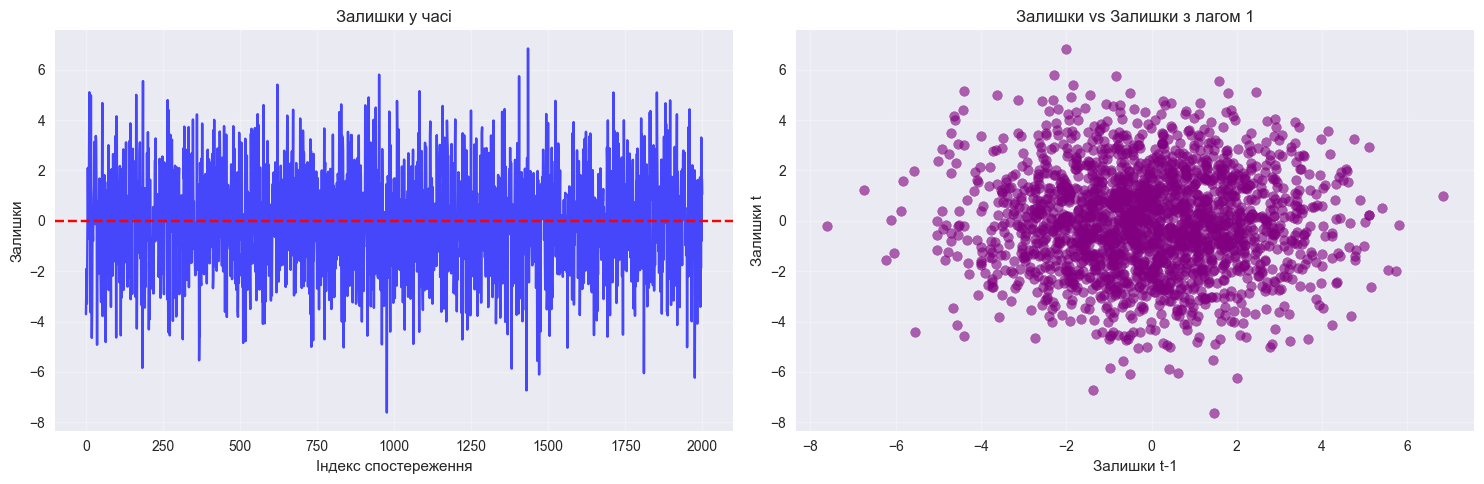


Загальний висновок: Автокореляція відсутня


In [112]:
# 5. Аналіз автокореляції
print("5. Аналіз автокореляції")

# Тест Дарбіна-Вотсона
dw_stat = durbin_watson(residuals)  # Обчислення статистики Дарбіна-Вотсона
print(f"Тест Дарбіна-Вотсона:")
print(f"Статистика Дарбіна-Вотсона: {dw_stat:.4f}")  # Виведення статистики

# Інтерпретація тесту Дарбіна-Вотсона
if dw_stat < 1.5:  # Якщо статистика < 1.5
    dw_conclusion = "Позитивна автокореляція"
elif dw_stat > 2.5:  # Якщо статистика > 2.5
    dw_conclusion = "Негативна автокореляція"
else:  # Інакше
    dw_conclusion = "Автокореляція відсутня"

print(f"Результат: {dw_conclusion}")  # Виведення результату

# Графік залишків у часі
plt.figure(figsize=(15, 5))  # Створення фігури з двома підграфіками

plt.subplot(1, 2, 1)  # Перший підграфік
plt.plot(residuals, 'b-', alpha=0.7)  # Графік залишків у часі
plt.axhline(y=0, color='red', linestyle='--')  # Горизонтальна лінія на рівні 0
plt.xlabel('Індекс спостереження')  # Підпис осі X
plt.ylabel('Залишки')  # Підпис осі Y
plt.title('Залишки у часі')  # Заголовок
plt.grid(True, alpha=0.3)  # Сітка

# Графік залишків vs залишків з лагом 1
plt.subplot(1, 2, 2)  # Другий підграфік
if len(residuals) > 1:  # Якщо є більше одного залишку
    plt.scatter(residuals[:-1], residuals[1:], alpha=0.6, color='purple')  # Розсіювання з лагом
    plt.xlabel('Залишки t-1')  # Підпис осі X
    plt.ylabel('Залишки t')  # Підпис осі Y
    plt.title('Залишки vs Залишки з лагом 1')  # Заголовок
    plt.grid(True, alpha=0.3)  # Сітка
    
    # Кореляція між залишками та залишками з лагом 1
    lag_correlation = np.corrcoef(residuals[:-1], residuals[1:])[0, 1]  # Обчислення кореляції
    print(f"\nКореляція між залишками та залишками з лагом 1: {lag_correlation:.4f}")  # Виведення кореляції
    
    if abs(lag_correlation) < 0.1:  # Якщо кореляція мала
        lag_conclusion = "Автокореляція відсутня"
    elif abs(lag_correlation) < 0.3:  # Якщо кореляція помірна
        lag_conclusion = "Слабка автокореляція"
    else:  # Інакше
        lag_conclusion = "Сильна автокореляція"
    
    print(f"Результат: {lag_conclusion}")  # Виведення результату

plt.tight_layout()  # Автоматичне розташування
plt.show()  # Відображення графіка

# Загальний висновок про автокореляцію
if 1.5 <= dw_stat <= 2.5 and (len(residuals) <= 1 or abs(lag_correlation) < 0.1):  # Якщо обидва тести підтверджують відсутність
    autocorrelation_conclusion = "Автокореляція відсутня"
elif 1.0 <= dw_stat <= 3.0 and (len(residuals) <= 1 or abs(lag_correlation) < 0.3):  # Якщо є слабка автокореляція
    autocorrelation_conclusion = "Слабка автокореляція"
else:  # Інакше
    autocorrelation_conclusion = "Автокореляція виявлена"

print(f"\nЗагальний висновок: {autocorrelation_conclusion}")  # Виведення загального висновку


In [113]:
# 6. Аналіз викидів та впливових спостережень
print("6. Аналіз викидів та впливових спостережень")

# Обчислення статистик для виявлення викидів
print("Статистики для виявлення викидів:")

# Z-бали для залишків тестової вибірки
z_scores = np.abs(stats.zscore(residuals))  # Обчислення Z-балів
outliers_z = np.where(z_scores > 3)[0]  # Викиди за Z-балами > 3
print(f"Викиди за Z-балами (>3σ): {len(outliers_z)} спостережень")  # Виведення кількості

# IQR метод для тестової вибірки
Q1 = np.percentile(residuals, 25)  # Перший квартиль
Q3 = np.percentile(residuals, 75)  # Третій квартиль
IQR = Q3 - Q1  # Міжквартильний розмах
lower_bound = Q1 - 1.5 * IQR  # Нижня межа
upper_bound = Q3 + 1.5 * IQR  # Верхня межа
outliers_iqr = np.where((residuals < lower_bound) | (residuals > upper_bound))[0]  # Викиди за IQR
print(f"Викиди за IQR методом: {len(outliers_iqr)} спостережень")  # Виведення кількості

# Cook's Distance для навчальної вибірки
k = X_train_final.shape[1]  # Кількість параметрів

# Обчислення залишків для навчальної вибірки
y_train_pred = X_train_final.dot(theta_final)  # Передбачення для навчальної вибірки
train_residuals = y_train - y_train_pred  # Залишки для навчальної вибірки
mse = np.mean(train_residuals**2)  # MSE для навчальної вибірки

H = X_train_final @ np.linalg.inv(X_train_final.T @ X_train_final) @ X_train_final.T  # Матриця H
h_ii = np.diag(H)  # Діагональні елементи (leverage)
cooks_d = (train_residuals**2 / (k * mse)) * (h_ii / (1 - h_ii)**2)  # Cook's Distance

# Поріг для Cook's Distance (зазвичай 4/n)
cooks_threshold = 4 / len(train_residuals)  # Поріг Cook's Distance
outliers_cooks = np.where(cooks_d > cooks_threshold)[0]  # Викиди за Cook's Distance
print(f"Викиди за Cook's Distance: {len(outliers_cooks)} спостережень")  # Виведення кількості

# Висновок про викиди
total_outliers = len(set(outliers_z) | set(outliers_iqr) | set(outliers_cooks))  # Загальна кількість викидів
outlier_percentage = (total_outliers / len(residuals)) * 100  # Відсоток викидів

print(f"\nПідсумок аналізу викидів:")
print(f"Загальна кількість викидів: {total_outliers}")  # Виведення загальної кількості
print(f"Відсоток викидів: {outlier_percentage:.2f}%")  # Виведення відсотка

if outlier_percentage < 5:  # Якщо відсоток < 5%
    outliers_conclusion = "Викиди відсутні або мінімальні"
elif outlier_percentage < 10:  # Якщо відсоток < 10%
    outliers_conclusion = "Помірна кількість викидів"
else:  # Інакше
    outliers_conclusion = "Значна кількість викидів"

print(f"Висновок: {outliers_conclusion}")  # Виведення висновку


6. Аналіз викидів та впливових спостережень
Статистики для виявлення викидів:
Викиди за Z-балами (>3σ): 4 спостережень
Викиди за IQR методом: 14 спостережень
Викиди за Cook's Distance: 390 спостережень

Підсумок аналізу викидів:
Загальна кількість викидів: 404
Відсоток викидів: 20.20%
Висновок: Значна кількість викидів


In [114]:
# Підсумок аналізу припущень
print("Підсумок аналізу припущень класичної лінійної регресії")

# Створення таблиці результатів
assumptions_results = [
    ["1. Лінійність зв'язку", linearity_conclusion],
    ["2. Відсутність мультиколінеарності", multicollinearity_conclusion],
    ["3. Нормальність залишків", normality_conclusion],
    ["4. Гомоскедастичність", homoscedasticity_conclusion],
    ["5. Відсутність автокореляції", autocorrelation_conclusion],
    ["6. Відсутність викидів", outliers_conclusion]
]

assumptions_df = pd.DataFrame(assumptions_results, columns=['Припущення', 'Результат'])
print("\nРезультати аналізу припущень:")
print(assumptions_df.to_string(index=False))

# Підрахунок виконаних припущень
passed_assumptions = sum(
    1 for _, result in assumptions_results 
    if "підтверджена" in result or "відсутня" in result or "відсутні" in result
)
total_assumptions = len(assumptions_results)

print(f"\nСтатистика виконання припущень:")
print(f"Виконано: {passed_assumptions}/{total_assumptions} припущень")
print(f"Відсоток виконання: {(passed_assumptions/total_assumptions)*100:.1f}%")

# Загальна якість моделі
if passed_assumptions >= 5:
    model_quality = "відмінна"
elif passed_assumptions >= 4:
    model_quality = "хороша"
elif passed_assumptions >= 3:
    model_quality = "задовільна"
else:
    model_quality = "слабка"

print(f"\nЗагальна якість моделі: {model_quality}")

# Рекомендації
print(f"\nРекомендації для покращення моделі:")
recommendations = []
if "не виконується" in linearity_conclusion or "частково" in linearity_conclusion:
    recommendations.append("• Розглянути нелінійні перетворення ознак або цільової змінної")
    recommendations.append("• Додати поліноміальні члени або взаємодії між ознаками")
if "виявлена" in multicollinearity_conclusion or "потенційна" in multicollinearity_conclusion:
    recommendations.append("• Видалити або об'єднати сильно корельовані ознаки")
    recommendations.append("• Використати регуляризацію (Ridge, Lasso)")
if "відхилена" in normality_conclusion or "частково" in normality_conclusion:
    recommendations.append("• Застосувати трансформацію цільової змінної (log, sqrt)")
    recommendations.append("• Використати робастні методи оцінки")
if "гетероскедастичність" in homoscedasticity_conclusion or "частково" in homoscedasticity_conclusion:
    recommendations.append("• Застосувати зважену регресію")
    recommendations.append("• Трансформувати цільову змінну")
if "виявлена" in autocorrelation_conclusion or "слабка" in autocorrelation_conclusion:
    recommendations.append("• Додати лагові змінні")
    recommendations.append("• Використати моделі з автокореляцією")
if "значна" in outliers_conclusion or "помірна" in outliers_conclusion:
    recommendations.append("• Перевірити та видалити викиди")
    recommendations.append("• Використати робастні методи регресії")
if not recommendations:
    recommendations.append("• Модель відповідає всім припущенням - можна використовувати для прогнозування")

for rec in recommendations:
    print(rec)

print(f"\nВисновок:")
print(f"Модель має {model_quality} якість з R² = {r2_test:.3f} та MSE = {mse_test:.6f}")
print(f"Виконано {passed_assumptions} з {total_assumptions} припущень класичної лінійної регресії")


Підсумок аналізу припущень класичної лінійної регресії

Результати аналізу припущень:
                        Припущення                          Результат
             1. Лінійність зв'язку       Лінійність виконується добре
2. Відсутність мультиколінеарності       Мультиколінеарність відсутня
          3. Нормальність залишків Нормальність залишків підтверджена
             4. Гомоскедастичність    Гомоскедастичність підтверджена
      5. Відсутність автокореляції             Автокореляція відсутня
            6. Відсутність викидів           Значна кількість викидів

Статистика виконання припущень:
Виконано: 4/6 припущень
Відсоток виконання: 66.7%

Загальна якість моделі: хороша

Рекомендації для покращення моделі:
• Модель відповідає всім припущенням - можна використовувати для прогнозування

Висновок:
Модель має хороша якість з R² = 0.989 та MSE = 4.082455
Виконано 4 з 6 припущень класичної лінійної регресії
